In [13]:
import pandas as pd

df = pd.read_csv("./data/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [16]:
df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [17]:
cat_col = [col for col in df.columns if df[col].dtype == "object"]
print("Categorical columns:", cat_col)

Categorical columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [18]:
num_col = [col for col in df.columns if df[col].dtype != "object"]
print("Numerical columns:", num_col)

Numerical columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [19]:
df[cat_col].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [20]:
round((df.isnull().sum() / df.shape[0]) * 100, 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [21]:
df = df.drop(columns=["Name", "Ticket", "Cabin"])
df.dropna(subset=["Embarked"], inplace=True)
df["Age"] = df["Age"].fillna(df["Age"].mean())

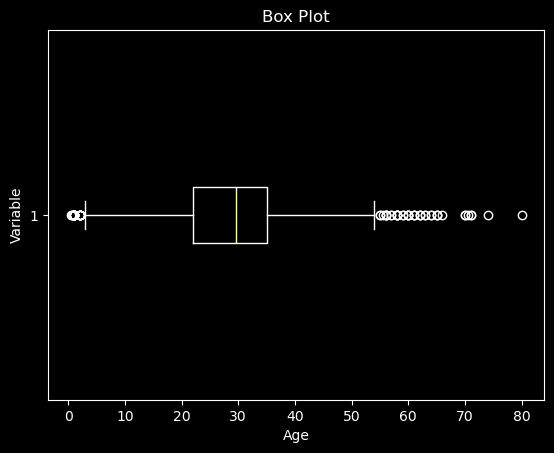

In [22]:
import matplotlib.pyplot as plt

plt.boxplot(df["Age"], vert=False)
plt.ylabel("Variable")
plt.xlabel("Age")
plt.title("Box Plot")
plt.show()

In [23]:
mean = df["Age"].mean()
std = df["Age"].std()

lower_bound = mean - 2 * std
upper_bound = mean + 2 * std

df = df[(df["Age"] >= lower_bound) & (df["Age"] <= upper_bound)]

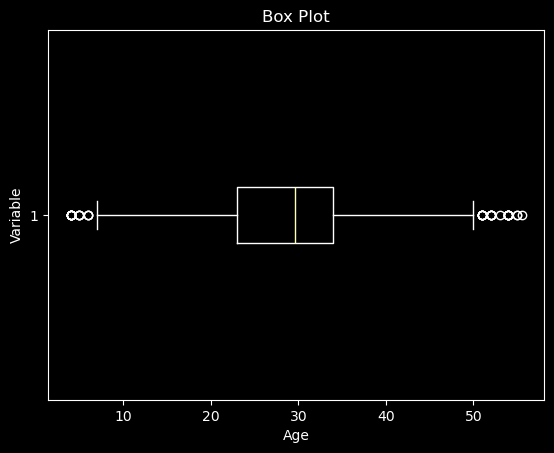

In [24]:
plt.boxplot(df["Age"], vert=False)
plt.ylabel("Variable")
plt.xlabel("Age")
plt.title("Box Plot")
plt.show()

In [25]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [28]:
X = df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
Y = df["Survived"]

In [33]:
x1 = X
num_col_ = [col for col in X.columns if X[col].dtype != "object"]
x1.loc[:, num_col_] = scaler.fit_transform(x1[num_col_])
x1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.349515,0.125,0.000000,0.014151,S
1,0.0,female,0.660194,0.125,0.000000,0.139136,C
2,1.0,female,0.427184,0.000,0.000000,0.015469,S
3,0.0,female,0.601942,0.125,0.000000,0.103644,S
4,1.0,male,0.601942,0.000,0.000000,0.015713,S
...,...,...,...,...,...,...,...
886,0.5,male,0.446602,0.000,0.000000,0.025374,S
887,0.0,female,0.291262,0.000,0.000000,0.058556,S
888,1.0,female,0.497905,0.125,0.333333,0.045771,S
889,0.0,male,0.427184,0.000,0.000000,0.058556,C
